In [1]:
'''
5. Random Forest
6. Gradient boosting
7. XGBoost

'''

'\n1. Logistic Regression\n2. K nearest neighbors\n3. Linear SVM (SVC)\n4. Decision tree\n5. Random Forest\n6. Gradient boosting\n7. XGBoost\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Data

In [3]:
attributes = pd.read_csv('attributes.csv', index_col=0)

In [4]:
attributes.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,1001.0,153.40,2019.0,0.27760,0.04904,0.6656,0.14710,0.01587,0.2654,0.3001,...,25.38,0.11840,0.006399,0.1622,0.2419,0.03003,0.4601,10.38,0.9053,17.33
1,1326.0,74.08,1956.0,0.07864,0.01308,0.1866,0.07017,0.01340,0.1860,0.0869,...,24.99,0.08474,0.005225,0.1238,0.1812,0.01389,0.2750,17.77,0.7339,23.41
2,1203.0,94.03,1709.0,0.15990,0.04006,0.4245,0.12790,0.02058,0.2430,0.1974,...,23.57,0.10960,0.006150,0.1444,0.2069,0.02250,0.3613,21.25,0.7869,25.53
3,386.1,27.23,567.7,0.28390,0.07458,0.8663,0.10520,0.01867,0.2575,0.2414,...,14.91,0.14250,0.009110,0.2098,0.2597,0.05963,0.6638,20.38,1.1560,26.50
4,1297.0,94.44,1575.0,0.13280,0.02461,0.2050,0.10430,0.01885,0.1625,0.1980,...,22.54,0.10030,0.011490,0.1374,0.1809,0.01756,0.2364,14.34,0.7813,16.67


In [5]:
clean_data = pd.read_csv('CleanData.csv', index_col = 0)

In [6]:
clean_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
target = clean_data[['diagnosis']]

# Train and Test Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)

In [10]:
print(X_train.shape, y_train.shape)

(426, 31) (426,)


In [11]:
print(X_test.shape, y_test.shape)

(143, 31) (143,)


In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imports for Evaluating Data

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [74]:
'''
Do i have to encode?

df = clean_data
encoded_data = pd.get_dummies(clean_data['diagnosis'])
df.drop(['diagnosis'], axis=1, inplace = True)
data = pd.concat([df, encoded_data], axis = 1)
data.rename(columns={0:'Benign', 1:'Malignant'}, inplace = True)
data.head()

'''

"\nDo i have to encode?\n\ndf = clean_data\nencoded_data = pd.get_dummies(clean_data['diagnosis'])\ndf.drop(['diagnosis'], axis=1, inplace = True)\ndata = pd.concat([df, encoded_data], axis = 1)\ndata.rename(columns={0:'Benign', 1:'Malignant'}, inplace = True)\ndata.head()\n\n"

In [46]:
model_log = LogisticRegression(random_state = 10)

In [47]:
model_log.fit(X_train_scaled, y_train)
predictions_log = model_log.predict(X_test_scaled)

In [48]:
print(confusion_matrix(y_test, predictions_log))
print(classification_report(y_test, predictions_log))

[[91  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        52

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



# K Nearest Neighbour

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [62]:
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)

In [63]:
print(confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

[[85  6]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        91
           1       0.89      0.90      0.90        52

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



## KNN with scaled data

In [64]:
model_knn_scaled = KNeighborsClassifier(n_neighbors=1)
model_knn_scaled.fit(X_train_scaled, y_train)
predictions_knn_scaled = model_knn_scaled.predict(X_test_scaled)

In [65]:
print(confusion_matrix(y_test, predictions_knn_scaled))
print(classification_report(y_test, predictions_knn_scaled))

[[91  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        52

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



## KNN Optimal K

In [69]:
error_rate = []

for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_prediction = knn.predict(X_test)
    error_rate.append(np.mean(k_prediction != y_test))

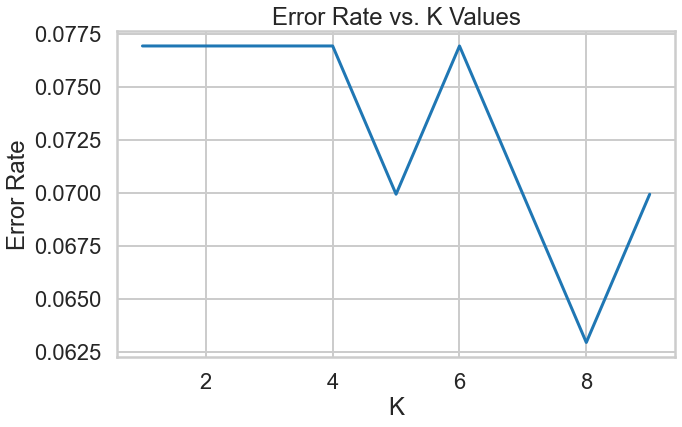

In [71]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(range(1,10),error_rate)
_ = plt.title('Error Rate vs. K Values')
_ = plt.xlabel('K')
_ = plt.ylabel('Error Rate')

In [73]:
knn_best_k = KNeighborsClassifier(n_neighbors=8)
knn_best_k.fit(X_train, y_train)
knn_best_k_predictions = knn_best_k.predict(X_test)
print(confusion_matrix(y_test, knn_best_k_predictions))
print(classification_report(y_test, knn_best_k_predictions))

[[87  4]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        91
           1       0.92      0.90      0.91        52

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Support Vector Classifier

In [22]:
from sklearn.svm import SVC

In [23]:
model_svc = SVC(random_state = 10)
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, predictions))

[[88  3]
 [ 8 44]]


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        91
           1       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



# SVC with best parameters

In [26]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)
parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

In [27]:
predictions_grid_svc = grid.predict(X_test)
print(confusion_matrix(y_test, predictions_grid_svc))

[[86  5]
 [ 5 47]]


In [28]:
print(classification_report(y_test, predictions_grid_svc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        91
           1       0.90      0.90      0.90        52

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



## SVC with scaling of data

In [29]:
model_svc_scaled = SVC(random_state = 10)
model_svc_scaled.fit(X_train_scaled, y_train)
predictions_scaled = model_svc.predict(X_test_scaled)

In [30]:
print(confusion_matrix(y_test, predictions_scaled))
print(classification_report(y_test, predictions_scaled))

[[91  0]
 [52  0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        91
           1       0.00      0.00      0.00        52

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using GridSearch to find optimal parameters for SVC

In [31]:
parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
print('Best Parameters: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator:  SVC(C=10, gamma=0.01)


In [33]:
predictions_grid_scaled_svc = grid.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_grid_scaled_svc))

[[90  1]
 [ 0 52]]


In [34]:
print(classification_report(y_test, predictions_grid_scaled_svc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.98      1.00      0.99        52

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

In [36]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)

In [37]:
model_rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
model_rfc.fit(X_train, y_train)
predictions_rfc = model_rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

[[91  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        52

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



30


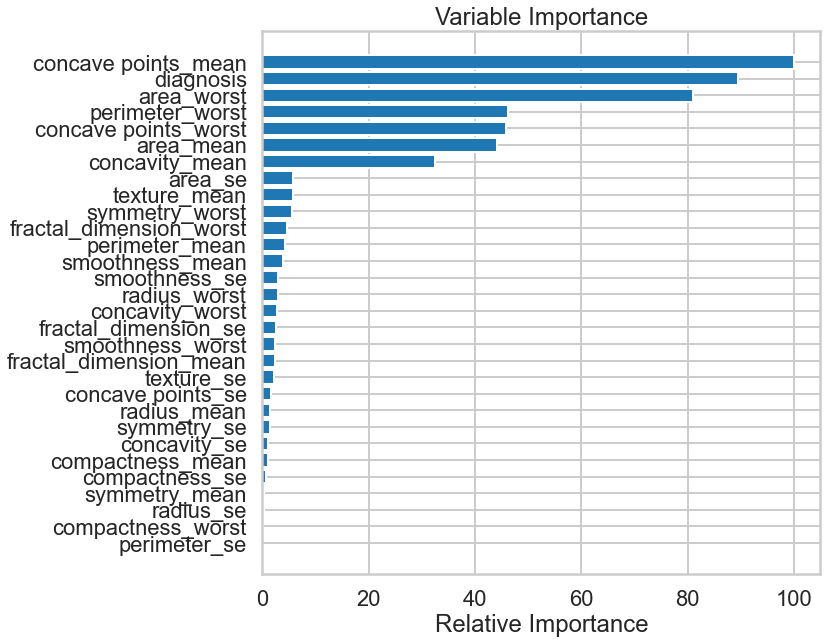

In [39]:
feature_importance = model_rfc.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Linear Discriminant Analysis

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
model_lda = LinearDiscriminantAnalysis(n_components = 1)
model_lda = model_lda.fit_transform(X_train, y_train)
X_test = model_lda.transform(X_test.value)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [ ]:
X.shape

In [ ]:
min(31, 1)